# KMeans 알고리즘 구현해 보기

### 데이터 만들기: 랜덤 좌표

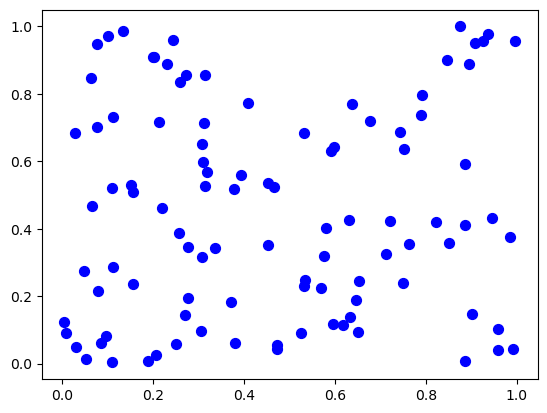

In [753]:
import numpy as np
import matplotlib.pyplot as plt

C1=np.random.rand(100,2)
# C2=-np.random.rand(50,2)
# C1[50:100,:]=C2
plt.scatter(C1[:,0],C1[:,1],s=50,c='blue') #2개의 클러스터: C1
plt.show()

In [754]:
arr=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [755]:
[np.median(arr[:,i]) for i in range(arr.shape[0])]

[4.0, 5.0, 6.0]

In [756]:
C1[0:5]

array([[0.27227183, 0.85660268],
       [0.2495933 , 0.05748681],
       [0.63850261, 0.76991751],
       [0.0777352 , 0.21670988],
       [0.63104326, 0.42630689]])

> 클러스터의 개수는 2개로 결정

### 클러스터 중심 정하기
- 전체 데이터의 중앙값과 가까운 위치로 설정

In [757]:
c_cluster=[np.median(C1[:,i]) for i in range(C1.shape[1])]+(np.random.rand(2,2)-0.5)
c_cluster

array([[0.20157219, 0.26437618],
       [0.56211033, 0.34463523]])

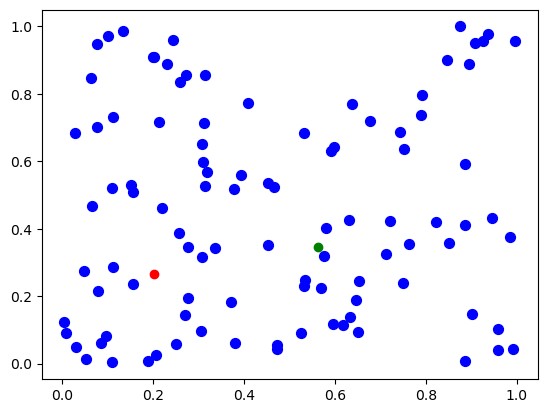

In [758]:
plt.scatter(C1[:,0],C1[:,1],s=50,c='blue') #2개의 클러스터: C1
plt.scatter(c_cluster[0,0],c_cluster[0,1],c='red') #무작위로 지정한 0번 클러스터 중심
plt.scatter(c_cluster[1,0],c_cluster[1,1],c='green') #무작위로 지정한 1번 클러스터 중심
plt.show()

### 각 점이 어느 클러스터에 속하는지 판단

#### 두 점의 거리(Euclidian)

In [759]:
def dist(x,y):
    return np.sqrt(np.sum([(m2-m1)**2 for (m1,m2) in zip(x,y)]))

In [760]:
dist(np.array([4,1]),np.array([1,5]))

5.0

In [761]:
what_cluster=[]

for c in C1:
    d0=dist(c,c_cluster[0])
    d1=dist(c,c_cluster[1])
    if d0>=d1:
        what_cluster.append(1)
    else:
        what_cluster.append(0)

In [762]:
uni,counts=np.unique(np.array(what_cluster),return_counts=True)
print(uni,counts)

[0 1] [43 57]


In [763]:
cluster_0=[]
cluster_1=[]

for d,c in zip(C1,what_cluster):
    if c==0:
        cluster_0.append(d)
    else:
        cluster_1.append(d)

cluster_0=np.array(cluster_0)
cluster_1=np.array(cluster_1)

In [764]:
cluster_1

array([[0.27227183, 0.85660268],
       [0.63850261, 0.76991751],
       [0.63104326, 0.42630689],
       [0.45194296, 0.53526178],
       [0.45329764, 0.35047005],
       [0.90266014, 0.14589521],
       [0.89480484, 0.88959123],
       [0.56892773, 0.22382745],
       [0.78853238, 0.73602118],
       [0.63318542, 0.1368279 ],
       [0.47162316, 0.05567947],
       [0.59848367, 0.6414628 ],
       [0.98666399, 0.37464891],
       [0.95953753, 0.03964153],
       [0.6783716 , 0.72006957],
       [0.85222731, 0.35687119],
       [0.71351867, 0.32523308],
       [0.5962328 , 0.11681405],
       [0.53308816, 0.24873837],
       [0.31175355, 0.71395904],
       [0.95847784, 0.10134438],
       [0.92666917, 0.95659827],
       [0.53168459, 0.6824613 ],
       [0.84794619, 0.89958678],
       [0.57515785, 0.31896372],
       [0.7914641 , 0.79733448],
       [0.59123288, 0.6290986 ],
       [0.82185246, 0.42034445],
       [0.9089216 , 0.9515097 ],
       [0.93715621, 0.97636157],
       [0.

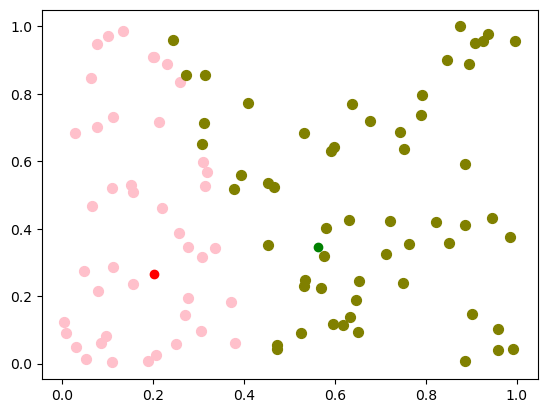

In [765]:
plt.scatter(cluster_0[:,0],cluster_0[:,1],s=50,c='pink') #0번 클러스터
plt.scatter(cluster_1[:,0],cluster_1[:,1],s=50,c='olive') #1번 클러스터
plt.scatter(c_cluster[0,0],c_cluster[0,1],c='red') #무작위로 지정한 0번 클러스터 중심
plt.scatter(c_cluster[1,0],c_cluster[1,1],c='green') #무작위로 지정한 1번 클러스터 중심
plt.show()

### 클러스터 중심 재설정

In [766]:
def cent(x):
    return np.array([np.mean(x[:,0]),np.mean(x[:,1])])

In [767]:
c_cluster[0]=cent(cluster_0)
c_cluster[1]=cent(cluster_1)

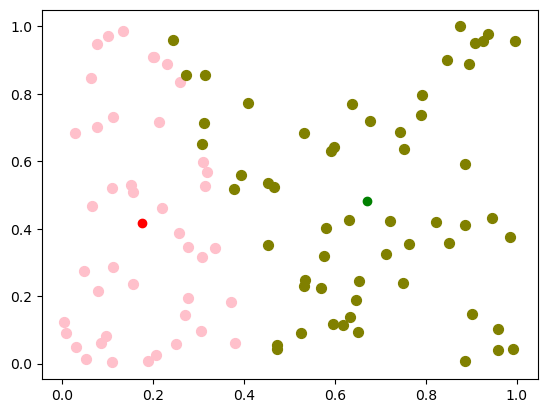

In [768]:
plt.scatter(cluster_0[:,0],cluster_0[:,1],s=50,c='pink') #0번 클러스터
plt.scatter(cluster_1[:,0],cluster_1[:,1],s=50,c='olive') #1번 클러스터
plt.scatter(c_cluster[0,0],c_cluster[0,1],c='red') #무작위로 지정한 0번 클러스터 중심
plt.scatter(c_cluster[1,0],c_cluster[1,1],c='green') #무작위로 지정한 1번 클러스터 중심
plt.show()

### 반복

In [769]:
for i in range(5):
    what_cluster=[]

    for c in C1:
        d0=dist(c,c_cluster[0])
        d1=dist(c,c_cluster[1])
        if d0>=d1:
            what_cluster.append(1)
        else:
            what_cluster.append(0)
    
    cluster_0=[]
    cluster_1=[]

    for d,c in zip(C1,what_cluster):
        if c==0:
            cluster_0.append(d)
        else:
            cluster_1.append(d)

    cluster_0=np.array(cluster_0)
    cluster_1=np.array(cluster_1)
    c_cluster[0]=cent(cluster_0)
    c_cluster[1]=cent(cluster_1)

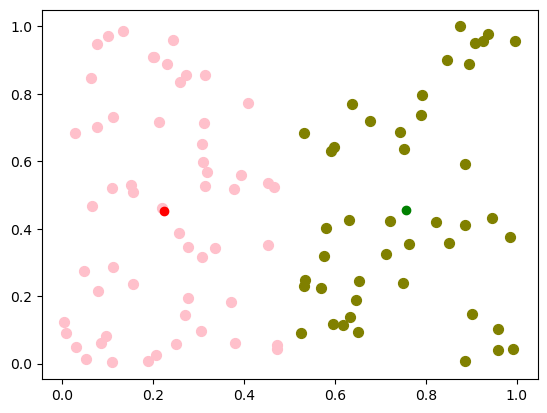

In [770]:
plt.scatter(cluster_0[:,0],cluster_0[:,1],s=50,c='pink') #0번 클러스터
plt.scatter(cluster_1[:,0],cluster_1[:,1],s=50,c='olive') #1번 클러스터
plt.scatter(c_cluster[0,0],c_cluster[0,1],c='red') #무작위로 지정한 0번 클러스터 중심
plt.scatter(c_cluster[1,0],c_cluster[1,1],c='green') #무작위로 지정한 1번 클러스터 중심
plt.show()

### 클러스터링 평가 척도(Dunn Index)

- Centroid Diameter Distance

In [771]:
cdd0=np.mean([dist(c,c_cluster[0]) for c in cluster_0])
cdd1=np.mean([dist(c,c_cluster[1]) for c in cluster_1])
print(max(cdd0,cdd1))

0.3123814970927829


- Centroid Linkage Distance

In [772]:
from itertools import combinations

cld=[]

for i,j in combinations(c_cluster,2):
    cld.append(dist(i,j))

print(min(cld))

0.533393691906333


In [773]:
min(cld)/max(cdd0,cdd1)

1.7075073167598833

___
## 정리하여 클래스로 만들기

In [774]:
class MyKMeans:
    n_clusters=0

    def __init__(self,n_cluster):
        self.n_clusters=n_cluster
    
    def __dist(self,x,y):
        return np.sqrt(np.sum([(m2-m1)**2 for (m1,m2) in zip(x,y)]))
    
    def __cent(self,x):
        return np.array([np.mean(x[:,0]),np.mean(x[:,1])])
    
    def fit(self,x,epoch=5):
        c_cluster=[np.median(x[:,i]) for i in range(x.shape[1])]+(np.random.rand(self.n_clusters,x.shape[1])-0.5) #클러스터 중심
        for i in range(epoch):
            what_cluster=[]
            
            for c in x:
                d=[self.__dist(c,cc) for cc in c_cluster]
                what_cluster.append(np.argmin(d))
    
            cls=[[] for i in range(self.n_clusters)] #각 클러스터의 구성원들
            
            for d,c in zip(x,what_cluster):
                cls[c].append(d)
            cls=[np.array(clss) for clss in cls]
            c_cluster=[]
            for clss in cls:
                c_cluster.append(self.__cent(clss))
        
        return cls,c_cluster
    
    def dunn_index(self,cls,cc):
        cdd=[]
        cld=[]

        for clss,c in zip(cls,cc):
            cdd.append(np.mean([self.__dist(c,clsss) for clsss in clss]))
        cdd_max=np.max(cdd)

        for i,j in combinations(cc,2):
            cld.append(self.__dist(i,j))
        cld_min=np.min(cld)

        return cld_min/cdd_max

In [775]:
km=MyKMeans(n_cluster=2)
rcls,ccls=km.fit(C1)

In [776]:
ccls

[array([0.74382185, 0.43766416]), array([0.21355773, 0.46685811])]

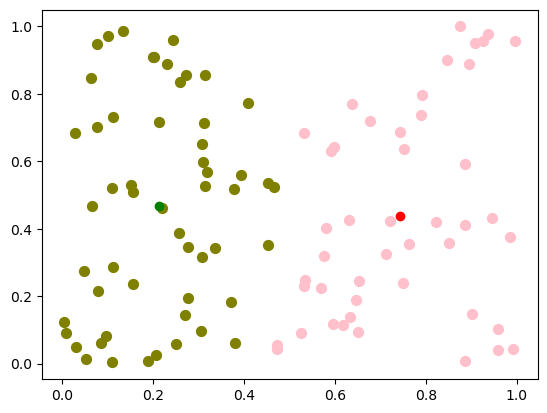

In [777]:
plt.scatter(rcls[0][:,0],rcls[0][:,1],s=50,c='pink') #0번 클러스터
plt.scatter(rcls[1][:,0],rcls[1][:,1],s=50,c='olive') #1번 클러스터
plt.scatter(ccls[0][0],ccls[0][1],c='red') #무작위로 지정한 0번 클러스터 중심
plt.scatter(ccls[1][0],ccls[1][1],c='green') #무작위로 지정한 1번 클러스터 중심
plt.show()

In [778]:
km.dunn_index(rcls,ccls)

1.6910950291814104

In [779]:
km=MyKMeans(n_cluster=4)
rcls,ccls=km.fit(C1)
km.dunn_index(rcls,ccls)

1.021402794236353

___
### Scikit Learn의 KMeans와 비교

In [780]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=4)
model.fit(C1)
predicted=model.predict(C1)
print(predicted)

c:\Users\dbtmd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dbtmd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 2 3 2 0 1 0 2 0 1 3 1 0 2 1 1 3 1 0 2 1 3 0 1 0 3 1 0 2 0 1 2 1 0 0 1 2
 2 0 3 1 3 0 3 2 1 3 0 2 2 3 3 1 3 1 0 0 0 1 1 0 2 2 2 1 0 1 1 2 0 2 0 0 1
 0 0 0 3 0 2 1 1 1 1 1 3 2 3 2 2 2 2 1 2 1 0 0 2 3 1]


In [781]:
model.cluster_centers_

array([[0.72631151, 0.24510389],
       [0.2392219 , 0.70758056],
       [0.2055513 , 0.1482649 ],
       [0.8035337 , 0.80239754]])

In [782]:
c=[[],[],[],[]]

for i,j in zip(C1,predicted):
    c[j].append(i)

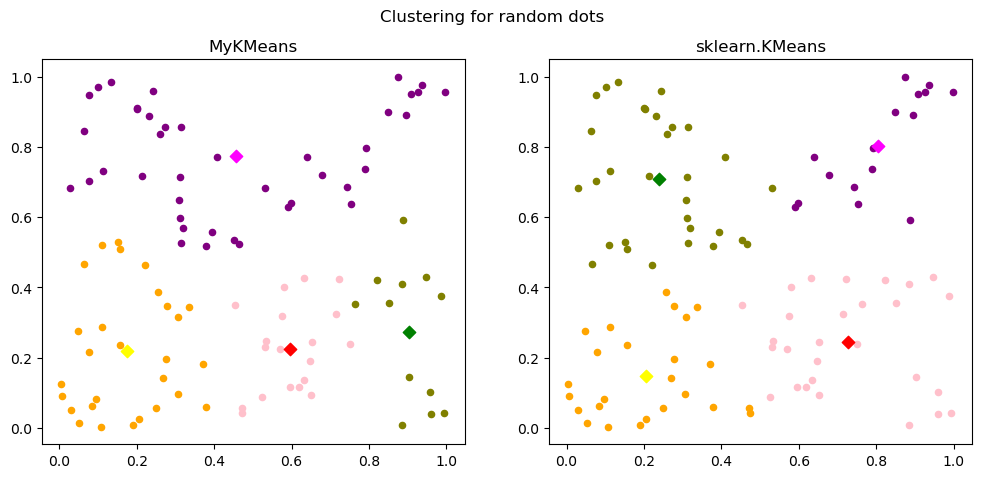

In [783]:
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#MyKMeans
ax1.scatter(rcls[0][:,0],rcls[0][:,1],s=20,c='pink')
ax1.scatter(rcls[1][:,0],rcls[1][:,1],s=20,c='olive')
ax1.scatter(rcls[2][:,0],rcls[2][:,1],s=20,c='orange')
ax1.scatter(rcls[3][:,0],rcls[3][:,1],s=20,c='purple')
ax1.scatter(ccls[0][0],ccls[0][1],c='red',s=40,marker='D')
ax1.scatter(ccls[1][0],ccls[1][1],c='green',s=40,marker='D')
ax1.scatter(ccls[2][0],ccls[2][1],c='yellow',s=40,marker='D')
ax1.scatter(ccls[3][0],ccls[3][1],c='magenta',s=40,marker='D')
ax1.set_title('MyKMeans')

#sklearn.KMeans
ax2.scatter(np.array(c[0])[:,0],np.array(c[0])[:,1],s=20,c='pink')
ax2.scatter(np.array(c[1])[:,0],np.array(c[1])[:,1],s=20,c='olive')
ax2.scatter(np.array(c[2])[:,0],np.array(c[2])[:,1],s=20,c='orange')
ax2.scatter(np.array(c[3])[:,0],np.array(c[3])[:,1],s=20,c='purple')
ax2.scatter(model.cluster_centers_[0][0],model.cluster_centers_[0][1],c='red',s=40,marker='D')
ax2.scatter(model.cluster_centers_[1][0],model.cluster_centers_[1][1],c='green',s=40,marker='D')
ax2.scatter(model.cluster_centers_[2][0],model.cluster_centers_[2][1],c='yellow',s=40,marker='D')
ax2.scatter(model.cluster_centers_[3][0],model.cluster_centers_[3][1],c='magenta',s=40,marker='D')
ax2.set_title('sklearn.KMeans')

plt.suptitle('Clustering For Random Dots')
plt.show()

___
## Iris 데이터셋에 적용

In [784]:
from sklearn.datasets import load_iris

iris=load_iris()['data']
mk_iris=MyKMeans(n_cluster=3)
rcls,ccls=mk_iris.fit(iris)
mk_iris.dunn_index(rcls,ccls)

1.5906957607119727